In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
original = pd.read_csv(
    "../data/reservoir/demanda_de_agua_ayura_LS.csv",
    index_col = 0,
    parse_dates = True)
original

,Total
Fecha,
2000-01-01 00:00:00,2837.56
2000-01-01 01:00:00,2117.37
2000-01-01 02:00:00,2583.98
2000-01-01 03:00:00,2539.89
2000-01-01 04:00:00,2433.10
...,...
2025-08-12 04:00:00,4788.01
2025-08-12 05:00:00,4656.21
2025-08-12 06:00:00,5641.75


<Axes: xlabel='Fecha'>

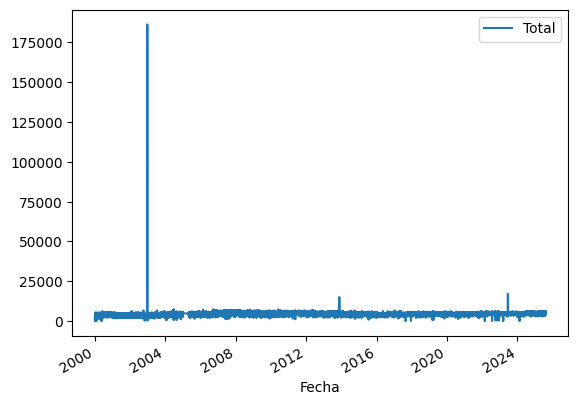

In [3]:
original.plot()

In [4]:
iso = IsolationForest(contamination=0.05, random_state=0)
labels = iso.fit_predict(original) == -1
filtrado = original.copy()
filtrado[labels] = np.nan

filtrado = filtrado.asfreq("h")

demandas = filtrado.interpolate(method="time", limit_direction="both")
demandas = demandas.resample("ME").sum() / 1e6

<Axes: xlabel='Fecha'>

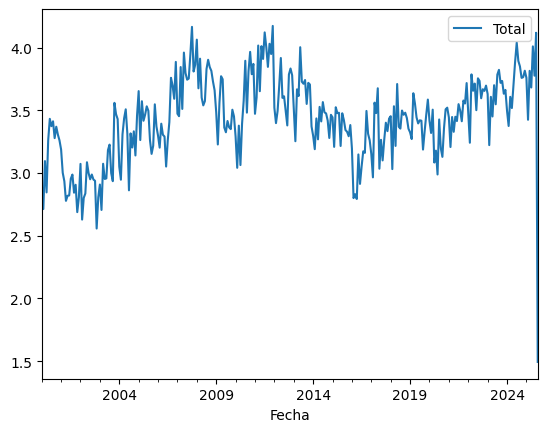

In [5]:
demandas.plot()

<Axes: xlabel='Fecha'>

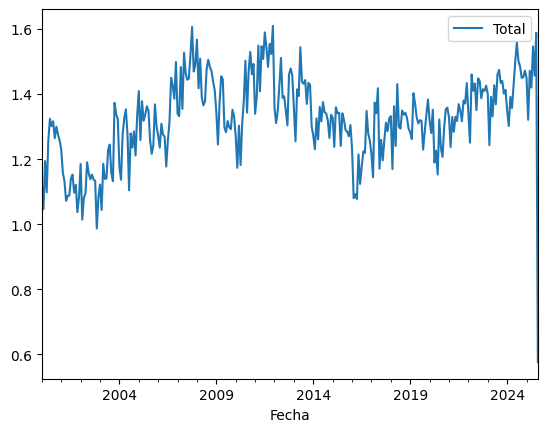

In [7]:
demand = demandas * 1e6 / 30 / 24 / 3600
demand.plot()

In [8]:
demand.to_csv("../data/reservoir/demand_clean.csv")